# Classifying handwritten digits using artificial neural networks

In [210]:
#pip install tensorflow

In [211]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, datasets, layers, optimizers

In [212]:
# https://keras.io/api/datasets/

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [213]:
X_train_full.shape

(60000, 28, 28)

In [214]:
X_test.shape

(10000, 28, 28)

In [215]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [216]:
X_train.shape

(50000, 28, 28)

In [217]:
X_valid.shape

(10000, 28, 28)

In [218]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

9


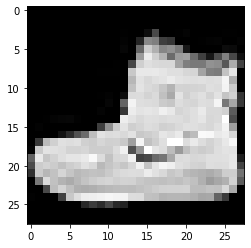

In [219]:
plt.imshow(X_train[0], cmap="gray")
print(y_train[0]);

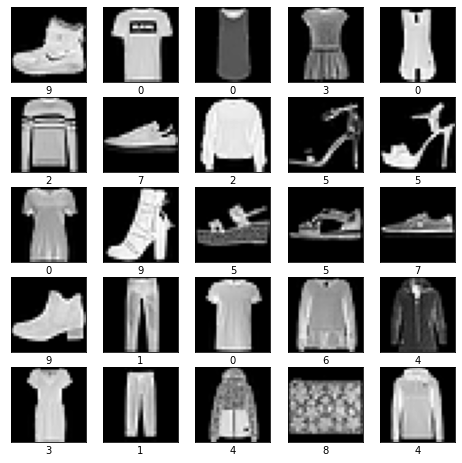

In [220]:
plt.figure(figsize=(8, 8))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.xlabel(y_train[i])
  plt.xticks([])
  plt.yticks([]);

In [221]:
y_train

array([9, 0, 0, ..., 5, 1, 7], dtype=uint8)

In [222]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [223]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [224]:
# Use a flatten input layer and output layer

ann1 = models.Sequential([
                        layers.Flatten(input_shape=(28, 28)),
                        layers.Dense(10, activation='softmax') # Softmax is the adequate activation as its a multiclass classification
])

ann1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [225]:
ann1.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [226]:
#ann1.fit(X_train, y_train, epochs=5)
ann1.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 20s 8ms/step - loss: 0.6202 - accuracy: 0.7933
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4717 - accuracy: 0.8399
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4418 - accuracy: 0.8476
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4275 - accuracy: 0.8513
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4169 - accuracy: 0.8558
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4081 - accuracy: 0.8592
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4034 - accuracy: 0.8614
Epoch 8/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.4005 - accuracy: 0.8609
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3954 - accuracy: 0.8629
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.

In [227]:
info = ann1.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid)) # Increasing epochs to 15 for better accuracy

Epoch 1/15
1563/1563 [==============================] - 17s 10ms/step - loss: 0.3908 - accuracy: 0.8640 - val_loss: 0.4300 - val_accuracy: 0.8475
Epoch 2/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3875 - accuracy: 0.8650 - val_loss: 0.4244 - val_accuracy: 0.8507
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3849 - accuracy: 0.8666 - val_loss: 0.4252 - val_accuracy: 0.8556
Epoch 4/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3832 - accuracy: 0.8673 - val_loss: 0.4196 - val_accuracy: 0.8555
Epoch 5/15
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3812 - accuracy: 0.8678 - val_loss: 0.4385 - val_accuracy: 0.8483
Epoch 6/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3806 - accuracy: 0.8663 - val_loss: 0.4215 - val_accuracy: 0.8540
Epoch 7/15
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3794 - accuracy: 0.8670 - val_loss: 0.4159 - val

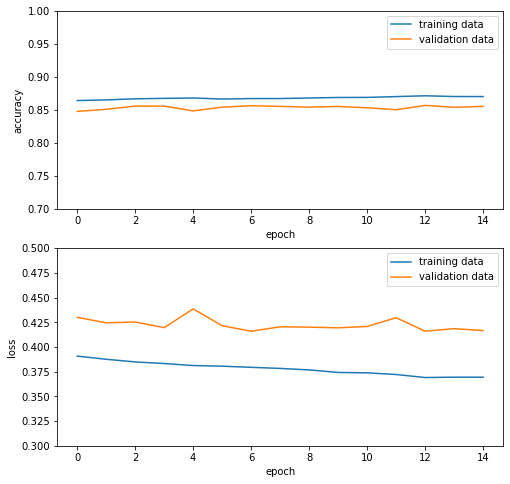

In [228]:
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.70,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.3,0.5])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [229]:
ann1.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4447 - accuracy: 0.8471


[0.4446908235549927, 0.847100019454956]

In [230]:
y_pred = ann1.predict(X_test)
y_pred[0]

313/313 [==============================] - 2s 4ms/step


array([1.2920597e-07, 3.2751113e-10, 4.0827777e-06, 4.2398333e-06,
       1.0959940e-06, 6.0554575e-02, 2.3368664e-05, 2.3187295e-02,
       1.7472861e-03, 9.1447800e-01], dtype=float32)

In [231]:
np.argmax(y_pred[0])

9

9


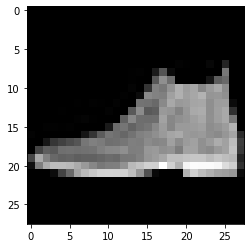

In [232]:
plt.imshow(X_test[0], cmap="gray")
print(y_test[0]);

In [233]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [234]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred_labels)
cm

array([[788,   3,  10,  51,   7,   1, 131,   0,   9,   0],
       [  3, 960,   3,  25,   5,   0,   3,   0,   1,   0],
       [ 22,   5, 710,  11, 136,   0, 110,   0,   6,   0],
       [ 23,  16,  14, 859,  34,   0,  49,   0,   5,   0],
       [  0,   1,  85,  29, 783,   0,  95,   0,   7,   0],
       [  0,   0,   0,   1,   0, 926,   0,  39,   4,  30],
       [118,   2, 101,  35, 101,   0, 627,   0,  16,   0],
       [  0,   0,   0,   0,   0,  39,   0, 914,   0,  47],
       [  6,   1,   4,   7,   4,   4,  28,   4, 942,   0],
       [  0,   0,   0,   0,   0,   7,   1,  30,   0, 962]], dtype=int64)

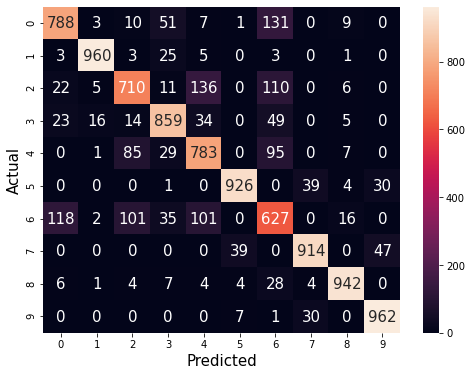

In [235]:
import seaborn as sn

plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [236]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.77      0.71      0.74      1000
           3       0.84      0.86      0.85      1000
           4       0.73      0.78      0.76      1000
           5       0.95      0.93      0.94      1000
           6       0.60      0.63      0.61      1000
           7       0.93      0.91      0.92      1000
           8       0.95      0.94      0.95      1000
           9       0.93      0.96      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [237]:
    #We are using two(2) hidden layers, Relu activation and L1 regularizer

ann2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer='l1'),
    layers.Dense(10),                          # New hidden layer with 10 params

    layers.Dense(10, activation='softmax')  #softmax is specially designed for multi-class classification tasks
])
optimizer = tf.keras.optimizers.Adam(lr=0.05)  #Although each optimizer automatically updates learning rate, here we manually set it at 0.05
ann2.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',  #sparse_categorical_crossentropy is best if target is one single integer number
             metrics=['accuracy'])

ann2.fit(X_train, y_train, epochs=5)

C:\Users\pawn\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
1563/1563 [==============================] - 21s 12ms/step - loss: 2.4203 - accuracy: 0.6861
Epoch 2/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1824 - accuracy: 0.7526
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0994 - accuracy: 0.7660
Epoch 4/5
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0598 - accuracy: 0.7722
Epoch 5/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0313 - accuracy: 0.7801


In [238]:
ann2.evaluate(X_valid, y_valid)

313/313 [==============================] - 6s 13ms/step - loss: 0.9755 - accuracy: 0.7879


[0.9754634499549866, 0.7878999710083008]

In [239]:
ann2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 128)               100480    
                                                                 
 dense_50 (Dense)            (None, 10)                1290      
                                                                 
 dense_51 (Dense)            (None, 10)                110       
                                                                 
Total params: 101,880
Trainable params: 101,880
Non-trainable params: 0
_________________________________________________________________


In [240]:
# Use dropout and batch normalization, this time implementing L2 regularizer

from keras.layers import Dropout, BatchNormalization

ann3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    
    layers.Dense(128, activation='tanh',kernel_regularizer='l2'),                   #lets use tanh instead of Relu
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='sigmoid')    #lets use here sigmoid instead of softmax
])

optimizer = tf.keras.optimizers.SGD(lr=0.01)    #lets create a variable to update learning rate using sochastic gradient descent

ann3.compile(optimizer=optimizer,               #Lets implement sgd optimizer instead of adam
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann3.fit(X_train, y_train, epochs=5)

C:\Users\pawn\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
1563/1563 [==============================] - 25s 11ms/step - loss: 2.2713 - accuracy: 0.7868
Epoch 2/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4070 - accuracy: 0.8248
Epoch 3/5
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9793 - accuracy: 0.8345
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7618 - accuracy: 0.8355
Epoch 5/5
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6405 - accuracy: 0.8368


In [241]:
ann3.evaluate(X_valid, y_valid)

313/313 [==============================] - 3s 6ms/step - loss: 0.6185 - accuracy: 0.8317


[0.6185211539268494, 0.8317000269889832]

In [244]:
ann3.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 128)               100480    
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_53 (Dense)            (None, 10)                1290      
                                                                 
Total params: 102,282
Trainable params: 102,026
Non-trainable params: 256
_____________________________________________

In [243]:
#  Summary

# Adam is the best optimizer
# Softmax is best for multiclass classification
# Using Keras There is no need to focus on the learning rate value
# Adam achieves good results, but SGD gave second best results
# The combination of Relu, Softmax, and Sparse_categorical_crossentropy gave us the best results
# L2 regularizer provided higher accuracy compared to L1

In [ ]:
# Use dropout and batch normalization


from keras.layers import Dropout, BatchNormalization

ann3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

ann3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann3.fit(X_train, y_train, epochs=5)